# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
# creating database connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [3]:
df.to_csv('vendor_sales_summary.csv',index = False)

# Exploratory Data Analysis
- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.
 
- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [4]:
# Summary statistics for numerical columns
summary_stats = df.describe().T
display(summary_stats)

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


## Summary Statistics Insights:
**Negative & Zero Values:**

- Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..
- Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.
- Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

**Outliers Indicated by High Standard Deviations:**

- Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
- Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
- Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [5]:
# Mode for each numerical column
mode_values = df.mode().iloc[0]
print("\nMode Values:\n\n",mode_values)


Mode Values:

 VendorNumber                            4425.0
VendorName               MARTIGNETTI COMPANIES
Brand                                      809
Description                   Southern Comfort
PurchasePrice                             6.53
ActualPrice                               9.99
Volume                                   750.0
TotalPurchaseQuantity                     12.0
TotalPurchaseDollars                     95.28
TotalSalesQuantity                        12.0
TotalSalesDollars                          0.0
TotalSalesPrice                            0.0
TotalExciseTax                             0.0
FreightCost                          144929.24
GrossProfit                             -106.8
ProfitMargin                              -inf
StockTurnover                              1.0
SalesToPurchaseRatio                       0.0
Name: 0, dtype: object


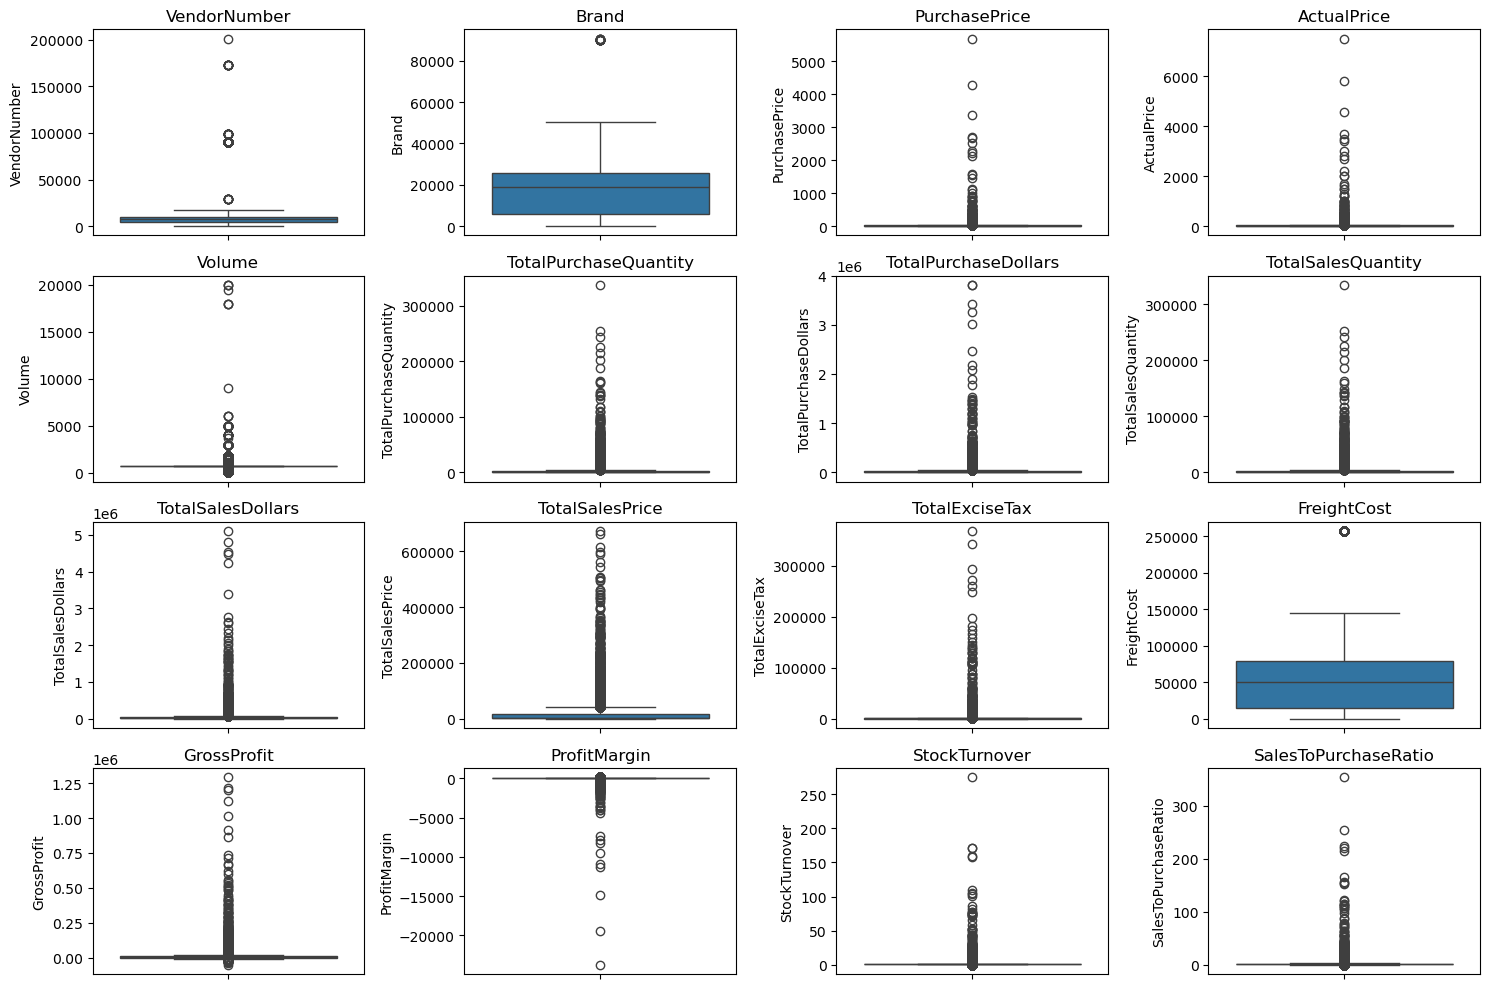

In [6]:
# Outlier Detection with Boxplots
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Summary Statistics Insights:
**Negative & Zero Values:**

- Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..
- Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.
- Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

**Outliers Indicated by High Standard Deviations:**

- Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
- Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
- Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [7]:
# Let's filter the data by removing inconsistencies
df = pd.read_sql_query("""SELECT * 
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""",conn)

In [8]:
df.shape

(8564, 18)

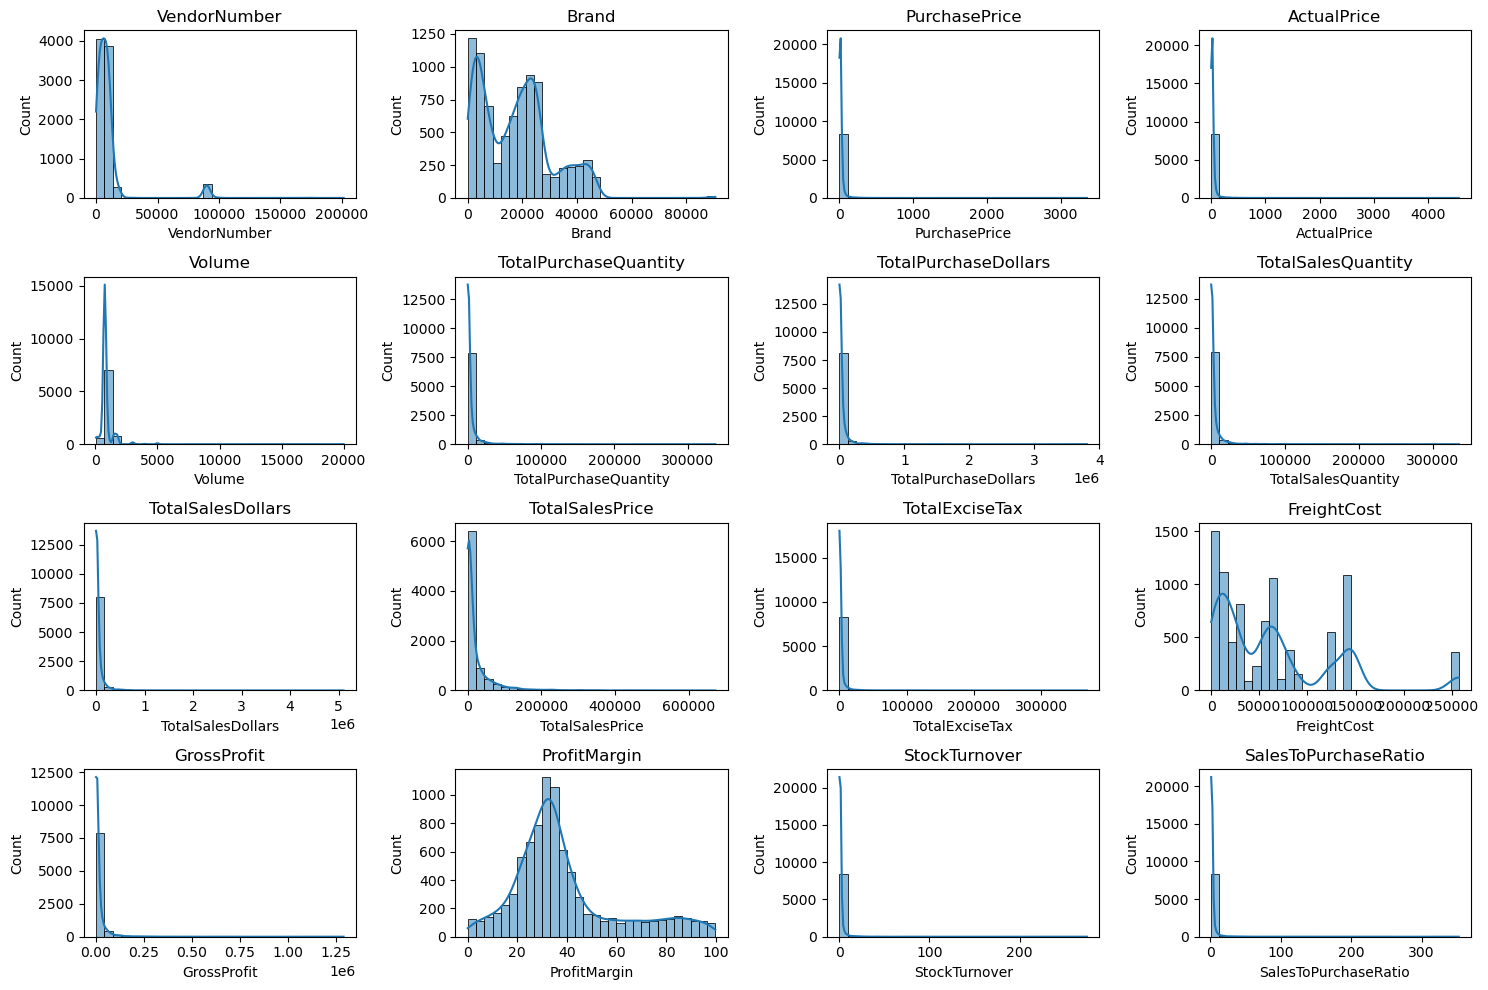

In [9]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) 
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

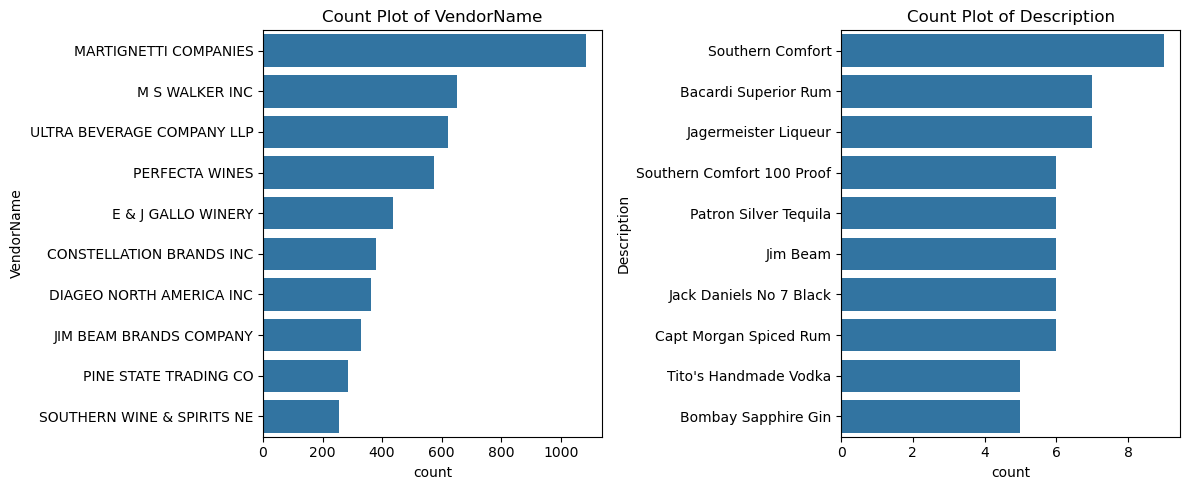

In [10]:
# Count Plots for Categorical Columns
categorical_cols = ['VendorName','Description']

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])   #Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

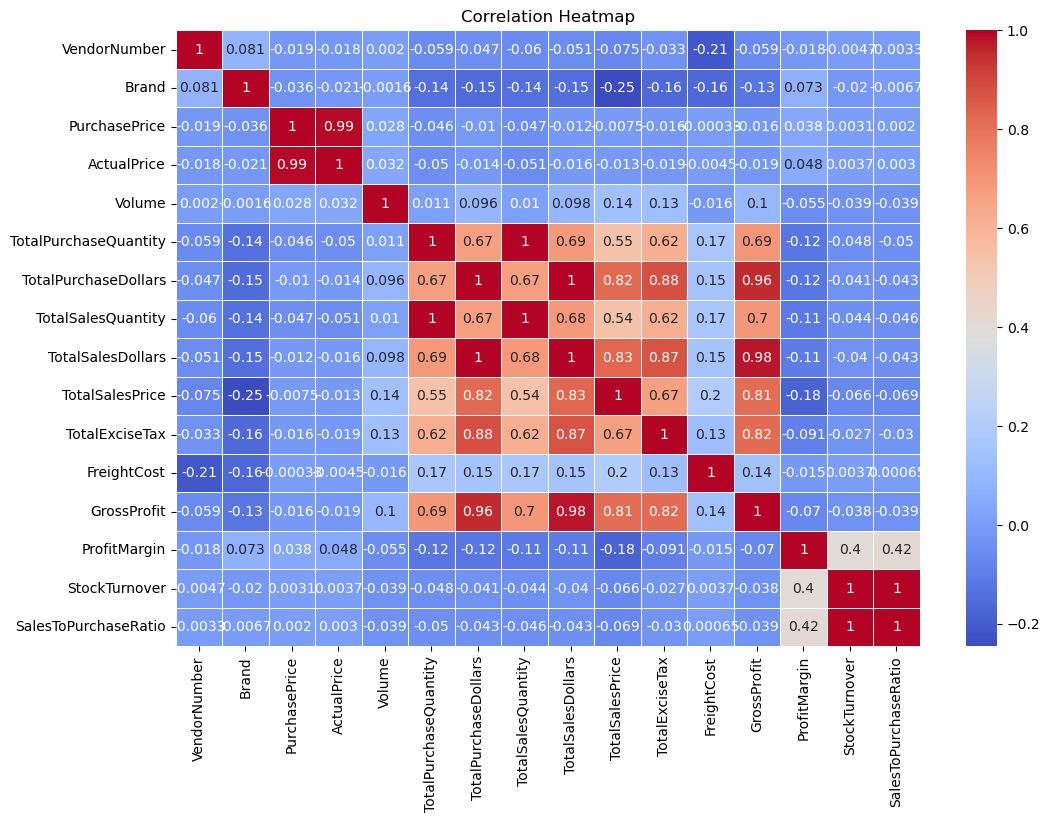

In [11]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [12]:
df[numerical_cols].corr()

,VendorNumber,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
VendorNumber,1.000000,0.080837,-0.018546,-0.017982,0.001972,-0.059279,-0.047170,-0.059920,-0.050760,-0.074871,-0.033071,-0.214275,-0.058736,-0.018227,-0.004734,-0.003305
Brand,0.080837,1.000000,-0.035829,-0.021102,-0.001639,-0.141124,-0.153734,-0.142383,-0.147284,-0.245188,-0.161722,-0.163922,-0.125213,0.073185,-0.019924,-0.006672
PurchasePrice,-0.018546,-0.035829,1.000000,0.994893,0.028484,-0.046426,-0.010400,-0.046817,-0.012162,-0.007515,-0.015920,-0.000335,-0.016491,0.038311,0.003121,0.001971
ActualPrice,-0.017982,-0.021102,0.994893,1.000000,0.032190,-0.050446,-0.014014,-0.050847,-0.015528,-0.013432,-0.019230,-0.004514,-0.019080,0.048138,0.003682,0.002986
Volume,0.001972,-0.001639,0.028484,0.032190,1.000000,0.011000,0.095939,0.010399,0.098008,0.135716,0.130300,-0.016202,0.100374,-0.055339,-0.038795,-0.038568
TotalPurchaseQuantity,-0.059279,-0.141124,-0.046426,-0.050446,0.011000,1.000000,0.673766,0.999119,0.685412,0.546461,0.617506,0.168084,0.694380,-0.121580,-0.047710,-0.049885
TotalPurchaseDollars,-0.047170,-0.153734,-0.010400,-0.014014,0.095939,0.673766,1.000000,0.671110,0.996734,0.822529,0.882750,0.152714,0.955625,-0.121235,-0.040866,-0.043491
TotalSalesQuantity,-0.059920,-0.142383,-0.046817,-0.050847,0.010399,0.999119,0.671110,1.000000,0.683866,0.543636,0.617109,0.169338,0.695859,-0.111655,-0.043708,-0.046031
TotalSalesDollars,-0.050760,-0.147284,-0.012162,-0.015528,0.098008,0.685412,0.996734,0.683866,1.000000,0.827065,0.873088,0.151665,0.976292,-0.108224,-0.040313,-0.042596
TotalSalesPrice,-0.074871,-0.245188,-0.007515,-0.013432,0.135716,0.546461,0.822529,0.543636,0.827065,1.000000,0.665277,0.197847,0.812376,-0.180082,-0.065556,-0.069362


## Correlation Insights
- PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
- Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
- Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
- StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.


# Data Analysis

#### Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [13]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [14]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum', # Sales performance metric
    'ProfitMargin': 'mean'      #Average profit margin
}).reset_index()

brand_performance.sort_values('ProfitMargin')

,Description,TotalSalesDollars,ProfitMargin
5485,Pepperjack Barossa Red,191.92,0.020842
2954,Flint & Steel Svgn Bl Napa V,119.92,0.033356
2179,Croft Tawny Porto,191.84,0.041701
2561,Douglass Hill Merlot,143.76,0.083472
5385,Parducci 13 True Grit Chard,24927.81,0.121190
...,...,...,...
4568,M Chiarlo Gavi Wh,1208.90,99.393664
657,Beniotome Sesame Shochu,4768.41,99.534226
6449,Skinnygirl Tangerine Vodka,2368.42,99.544844
2411,DiSaronno Amaretto,4781.16,99.553246


In [15]:
# Threshold for "Low sales" (bottom 15%) and "high margin" (top 15%)
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brand with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brand with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


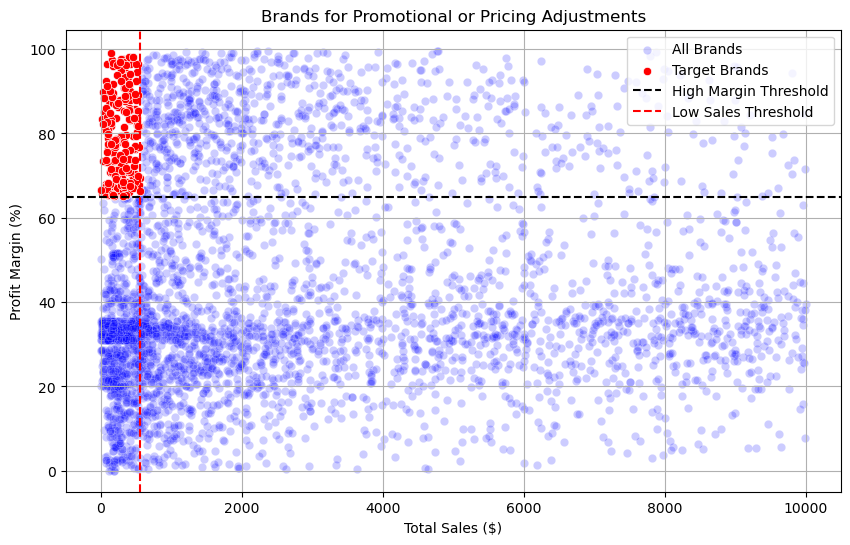

In [16]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]   #for better visualization

plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue', label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label='Target Brands')

plt.axhline(high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='red', label='Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

#### Which vendors and brands demonstrate the highest sales perfromance?

In [17]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [18]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby("Description")['TotalSalesDollars'].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

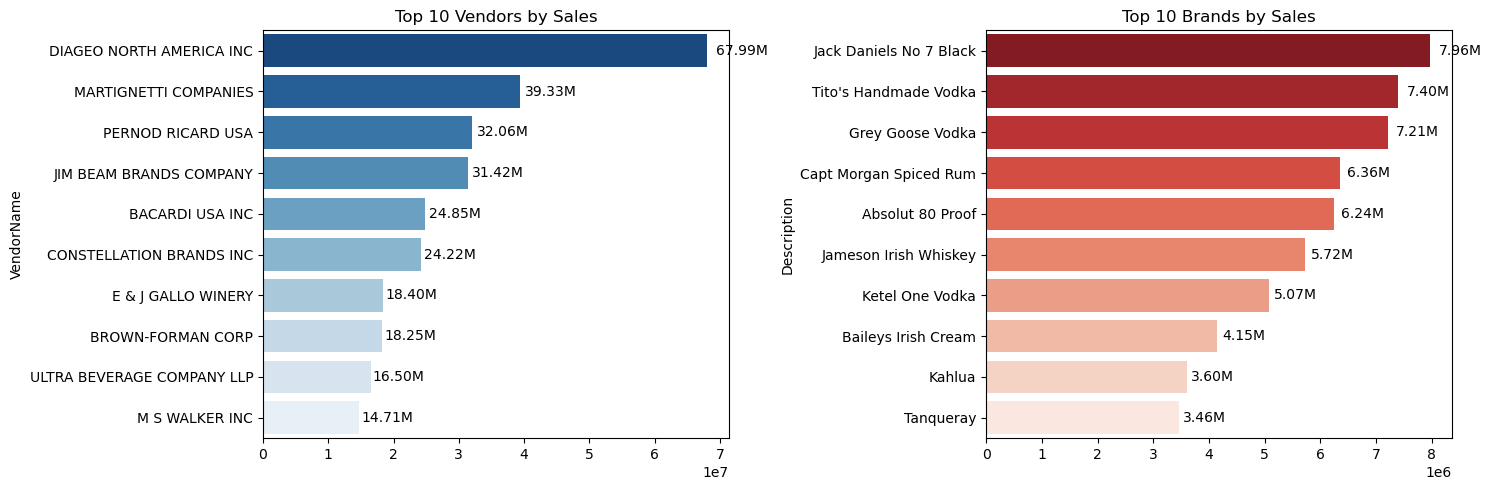

In [19]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette='Blues_r')
plt.title('Top 10 Vendors by Sales')

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center',fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

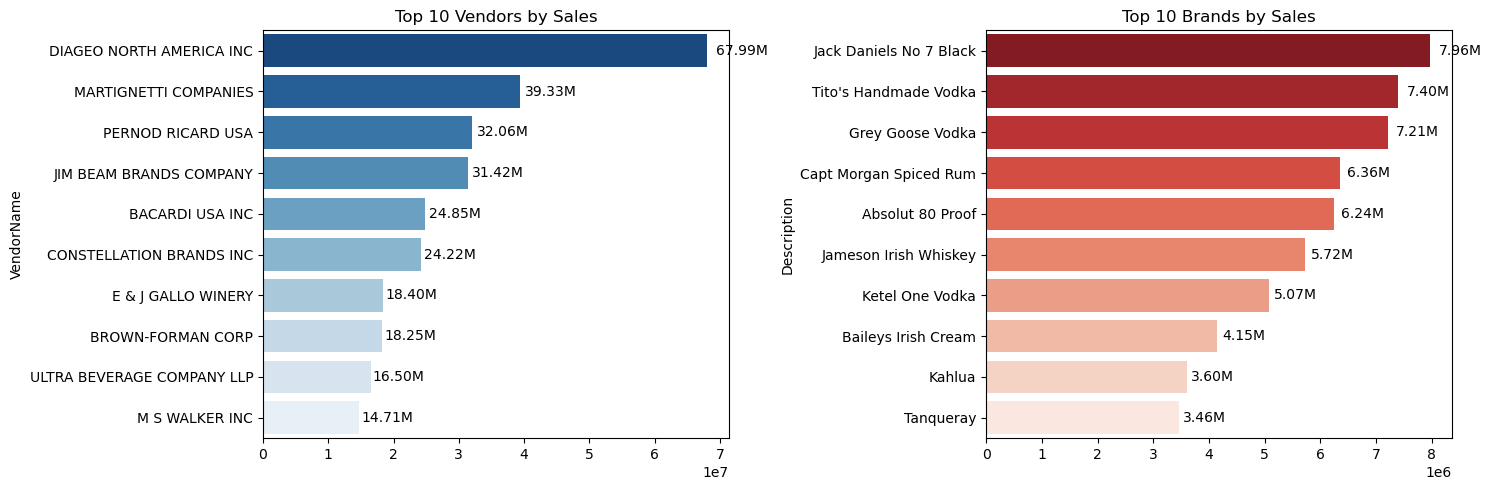

In [20]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette='Blues_r')
plt.title('Top 10 Vendors by Sales')

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center',fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Which vendors contribute the most to total purchase dollars?

In [21]:
# Rank Vendors by Total Purchase Dollars
vendor_performance = df.groupby("VendorName").agg({
    "TotalPurchaseDollars":"sum",
    "GrossProfit":"sum",
    "TotalSalesDollars":"sum"
}).reset_index()

# Calculate Contribution % to Overall Procurement
vendor_performance["Purchase_Contribution%"] = (vendor_performance["TotalPurchaseDollars"] / vendor_performance["TotalPurchaseDollars"].sum()) * 100

# Rank Vendors by Total Purchase Dollars & Profitabilty
vendor_performance = round(vendor_performance.sort_values(by="TotalPurchaseDollars", ascending=False),2)

# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


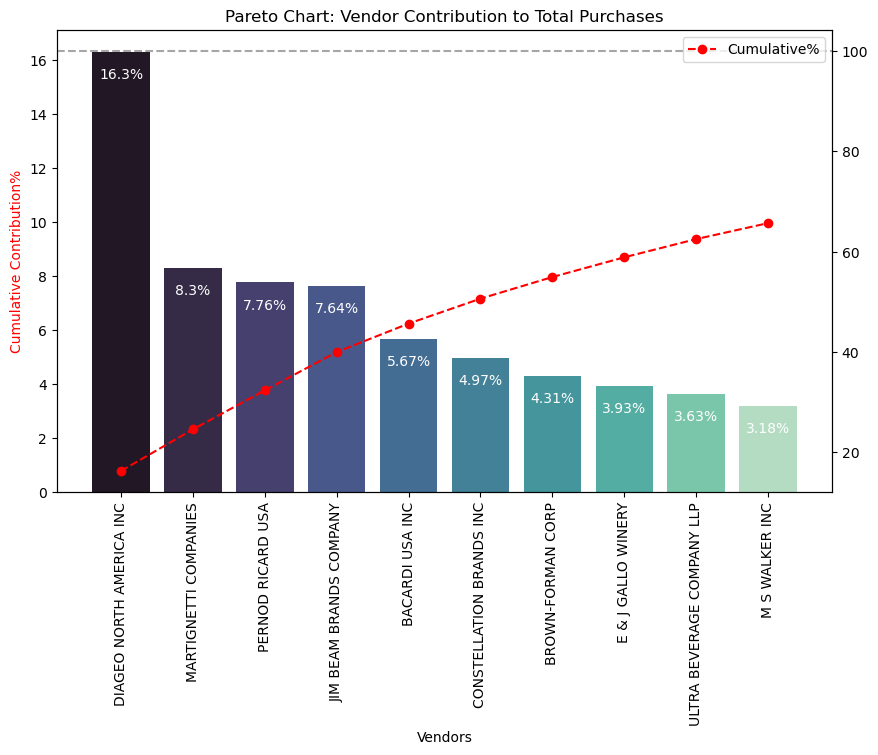

In [22]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'], palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution%', color='blue')
ax1.set_ylabel('Cumulative Contribution%', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')

plt.show()
    

### How much of total procurement is dependent on the top vendors?

Total Purchase Contribution of top 10 vendors is 65.69%


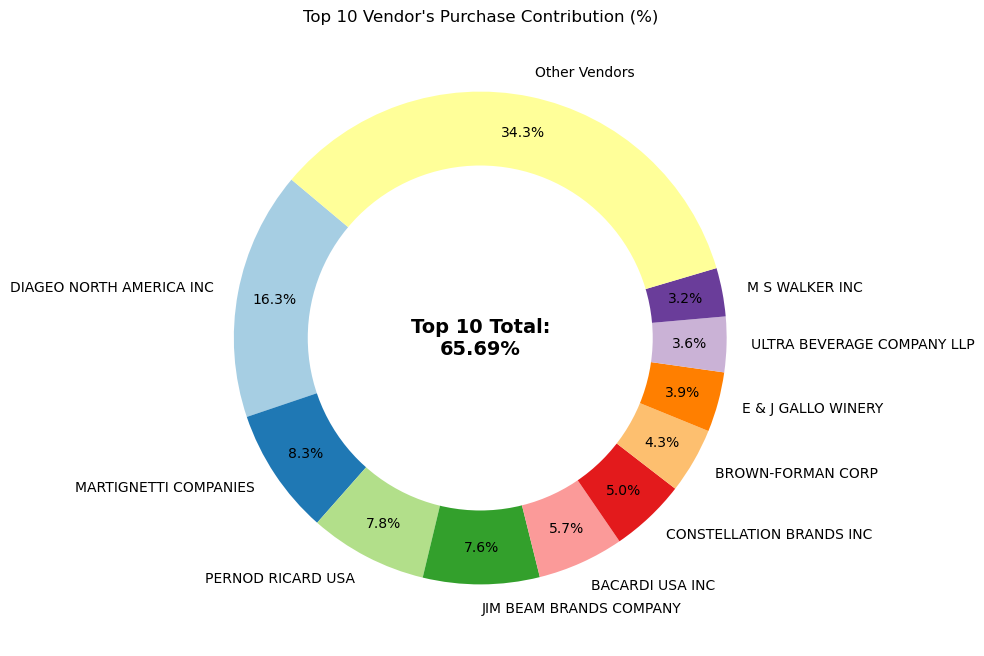

In [23]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(),2)}%")

vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the centre to create a "donut" effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

The remaining vendors contribute only 34.31%, meaning they are not utilized effectively or may not be as competitive. If vendor dependency is too high, consider identifying new suppliers to reduce risk.

#### Does purchasing inn bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [24]:
# Calculate Unit Purchase Price per Vendor & Volume Group
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

# Group by Order Sizes (e.g., Small, Medium, Large Purchases)
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small','Medium', 'Large'])

#Analyst Cost Savings per Order Size
bulk_purchase_analysis = df.groupby('OrderSize')['UnitPurchasePrice'].mean().reset_index()
print(bulk_purchase_analysis)

  OrderSize  UnitPurchasePrice
0     Small          39.068186
1    Medium          15.486414
2     Large          10.777625


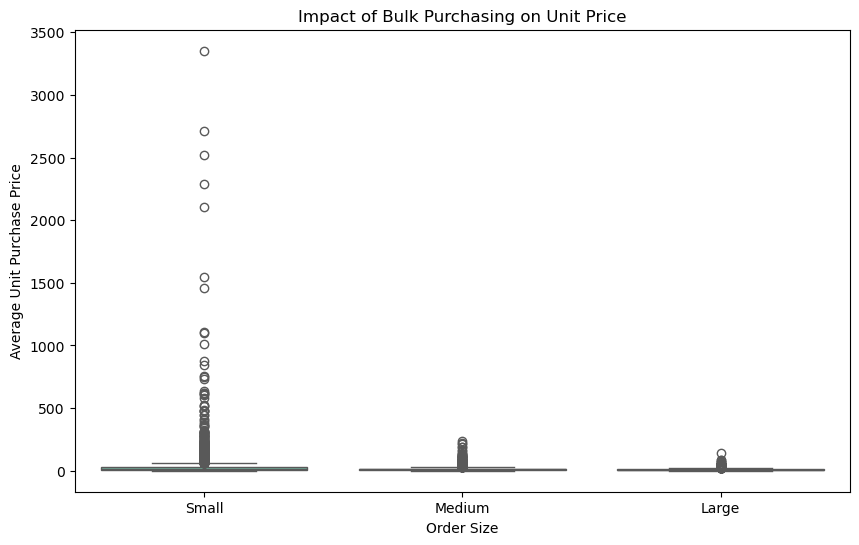

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='OrderSize', y='UnitPurchasePrice', palette='Set2')
plt.title('Impact of Bulk Purchasing on Unit Price')
plt.xlabel('Order Size')
plt.ylabel('Average Unit Purchase Price')
plt.show()

- Vendors buying in bulk(Larger Order Size) get the lowest unit price($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference betweent Small and Large orders is substantial(~72% reduction in unit cost)
- This suggest that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

#### Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [26]:
# Identify Low Inventory Turnover Vendors
low_turnover_vendors = df[df['StockTurnover'] < 1].groupby('VendorName')['StockTurnover'].mean().reset_index()

# Sort by Lowest Turnover
low_turnover_vendors = low_turnover_vendors.sort_values(by='StockTurnover', ascending=True)
low_turnover_vendors.head(10)

,VendorName,StockTurnover
0,ALISA CARR BEVERAGES,0.615385
36,HIGHLAND WINE MERCHANTS LLC,0.708333
60,PARK STREET IMPORTS LLC,0.751306
19,Circa Wines,0.755676
26,Dunn Wine Brokers,0.766022
15,CENTEUR IMPORTS LLC,0.773953
78,SMOKY QUARTZ DISTILLERY LLC,0.783835
90,TAMWORTH DISTILLING,0.797078
91,THE IMPORTED GRAPE LLC,0.807569
101,WALPOLE MTN VIEW WINERY,0.820548


- Slow-moving inventory increases holding costs (warehouse rent, insurance, depreciation)
- Identifying vendors with low inventory turnover is critical for business efficiency, cost reduction, and profitability.

#### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [27]:
# Calculate Unsold Inventory Value
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital:', format_dollars(df['UnsoldInventoryValue'].sum()))

# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

# Sort Vendors with the Highest Locked Capital 
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue', ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

Total Unsold Capital: 2.71M


,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


#### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors?

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


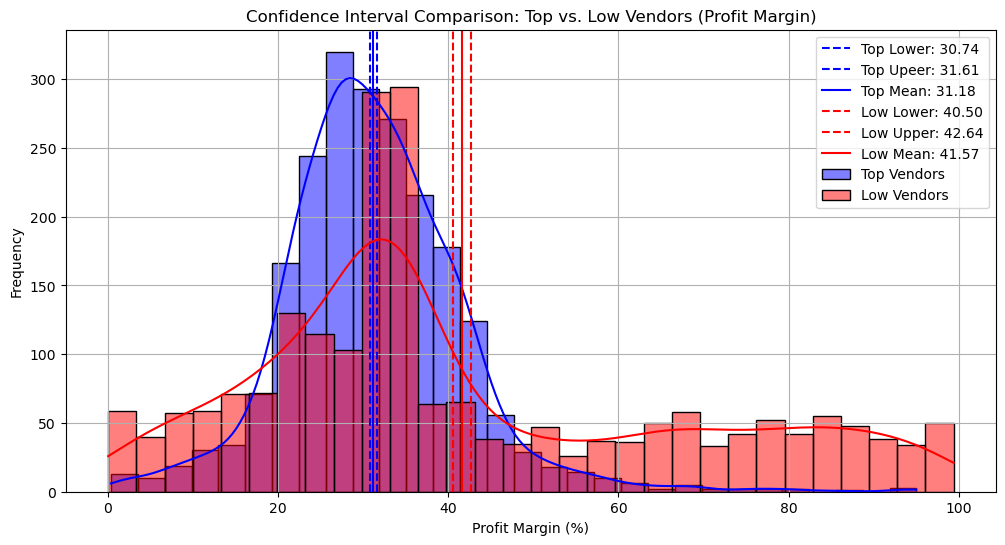

In [28]:
# Define top and Low vendors based on Total Sales Dollars (Top 25% & Bottom 25%)
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

# Function to compute confidence interval
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))       #Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

# Compute confidence interval
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color='blue', bins=30, alpha=0.5, label='Top Vendors')
plt.axvline(top_lower, color='blue', linestyle='--', label=f'Top Lower: {top_lower:.2f}')
plt.axvline(top_upper, color='blue', linestyle='--', label=f'Top Upeer: {top_upper:.2f}')
plt.axvline(top_mean, color='blue', linestyle='-', label=f'Top Mean: {top_mean:.2f}')

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color='red', bins=30, alpha=0.5, label='Low Vendors')
plt.axvline(low_lower, color='red', linestyle='--', label=f'Low Lower: {low_lower:.2f}')
plt.axvline(low_upper, color='red', linestyle='--', label=f'Low Upper: {low_upper:.2f}')
plt.axvline(low_mean, color='red', linestyle='-', label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

- The confidencde interval for low-performing vendors (40.50% to 42.64%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
- This suggest that vendors with lower sales tend to maintain higher profit nmargins, potentially due to premiun pricing or lower operational costs.
- For High-Performing Vendors: If they aim to improve profitability, they coukd explore selective price adjustments, cost optimization, or bundling strategies.
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

#### Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H₁ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [29]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

# Perform Two-Sample t-test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f'T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}')
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: -17.6695, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.


- A p-value this small suggests that the difference is not just statistically significant but also practically meaningful.
- The two vendor groups operate very differently in terms of profitability.

In [30]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,...,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,...,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large,87913.29
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,...,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,...,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,...,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large,49712.19


In [32]:
# Exporting the cleaned data 
df.to_excel("vendor_sales_summary_clean.xlsx", index=False)